### Generador de grafos no dirigidos
Construya un generador de grafos no dirigidos, no ponderados, cuyos parámetros de
entrada son |V | = n (número de nodos), y k (tamaño del clique máximo k < n). El grafo generado
debe tener n nodos y un clique máximo de tamaño k y aristas aleatorias. El formato de salida se
debe especificar en un archivo README.

In [105]:
def crear_arista(grafo:dict, origen:int,destino:int):
    adyacentes_origen=grafo[origen]
    if destino not in adyacentes_origen:
        adyacentes_origen.append(destino)
    adyacentes_origen.sort() # No es necesario pero para que se vea más bonito xd
    adyacentes_destino = grafo[destino]
    if origen not in adyacentes_destino:
        adyacentes_destino.append(origen)
    adyacentes_destino.sort()
    

In [106]:
import random as rand
def generador(num_nodos:int, tamanio_clique:int)->tuple:
    if tamanio_clique>=num_nodos:
        return {}
    
    # Estructuras iniciales
    nodos_clique=[]
    grafo={}
    
    # Crear las listas de adyacencia
    for i in range(num_nodos):
        grafo[i]=[]

    # Generar los nodos random que van a hacer parte del clique
    while len(nodos_clique)<tamanio_clique:
        nodo_random = rand.randrange(0,num_nodos)
        if nodo_random not in nodos_clique:
            nodos_clique.append(nodo_random)
    
    # Generar las aristas no dirigidas y no ponderadas del clique     
    
    for idx_origen in range(len(nodos_clique)):
        for idx_destino in range(idx_origen+1,len(nodos_clique)):
            crear_arista(grafo,nodos_clique[idx_origen],nodos_clique[idx_destino])
            
    num_aristas_clique=tamanio_clique*(tamanio_clique-1)//2
    num_aristas_total=num_nodos*(num_nodos-1)//2
    
    # Aristas aleatorias
    aristas_extra=rand.randrange(1,num_aristas_total-num_aristas_clique-1)//3 #-1 y // 3 para que no termine de generar un grafo completo
    aristas_creadas=0
    
    while aristas_creadas<aristas_extra:
        origen_random = rand.randint(0,num_nodos-1)
        destino_random = rand.randint(0,num_nodos-1)
        if origen_random!=destino_random and origen_random not in grafo[destino_random] and destino_random not in grafo[origen_random]:
            crear_arista(grafo,origen_random,destino_random)
            aristas_creadas+=1
            
    return nodos_clique,grafo,aristas_extra
print(generador(100,20))

([50, 33, 63, 15, 72, 94, 80, 49, 44, 9, 29, 14, 17, 82, 55, 74, 8, 91, 45, 75], {0: [9, 12, 13, 19, 20, 34, 50, 51, 52, 66, 79, 93], 1: [7, 11, 32, 37, 42, 44, 48, 52, 55, 65, 69, 72, 75, 78, 82, 84, 96, 97], 2: [7, 9, 10, 15, 19, 21, 34, 38, 39, 55, 57, 60, 64, 85, 86, 99], 3: [22, 27, 28, 29, 42, 51, 57, 76, 81, 89, 95], 4: [14, 22, 37, 43, 49, 54, 55, 57, 60, 70, 82, 84, 87, 95, 99], 5: [12, 49, 95, 96], 6: [11, 22, 29, 30, 32, 62, 80], 7: [1, 2, 13, 14, 24, 29, 32, 36, 47, 74, 94], 8: [9, 14, 15, 17, 29, 33, 37, 41, 44, 45, 46, 49, 50, 52, 55, 62, 63, 72, 74, 75, 78, 80, 82, 91, 94], 9: [0, 2, 8, 12, 14, 15, 17, 20, 28, 29, 33, 39, 41, 44, 45, 49, 50, 55, 57, 63, 70, 71, 72, 74, 75, 80, 82, 83, 90, 91, 94], 10: [2, 19, 26, 59, 63, 92, 98], 11: [1, 6, 18, 19, 31, 32, 71, 84], 12: [0, 5, 9, 20, 29, 36, 39, 45, 94, 96], 13: [0, 7, 16, 23, 29, 50, 68, 74], 14: [4, 7, 8, 9, 15, 17, 29, 33, 36, 38, 39, 44, 45, 49, 50, 55, 58, 61, 63, 72, 74, 75, 80, 82, 84, 91, 94, 96], 15: [2, 8, 9, 14

## Algoritmo Genético
### Esta cosa usa una mini modificación de pyeasyga para poder guardar el historial completo y graficarlo
Aquí iría un increible algoritmo genético

In [107]:
import pyeasyga.pyeasyga as galib

In [108]:
num_nodos = int(input("Ingrese el número de nodos en el grafo (n): "))
clique_max = int(input("Ingrese el clique máximo que desea en el grafo (k<n): "))
nodos_clique,grafo,aristas_extra=generador(num_nodos,clique_max)

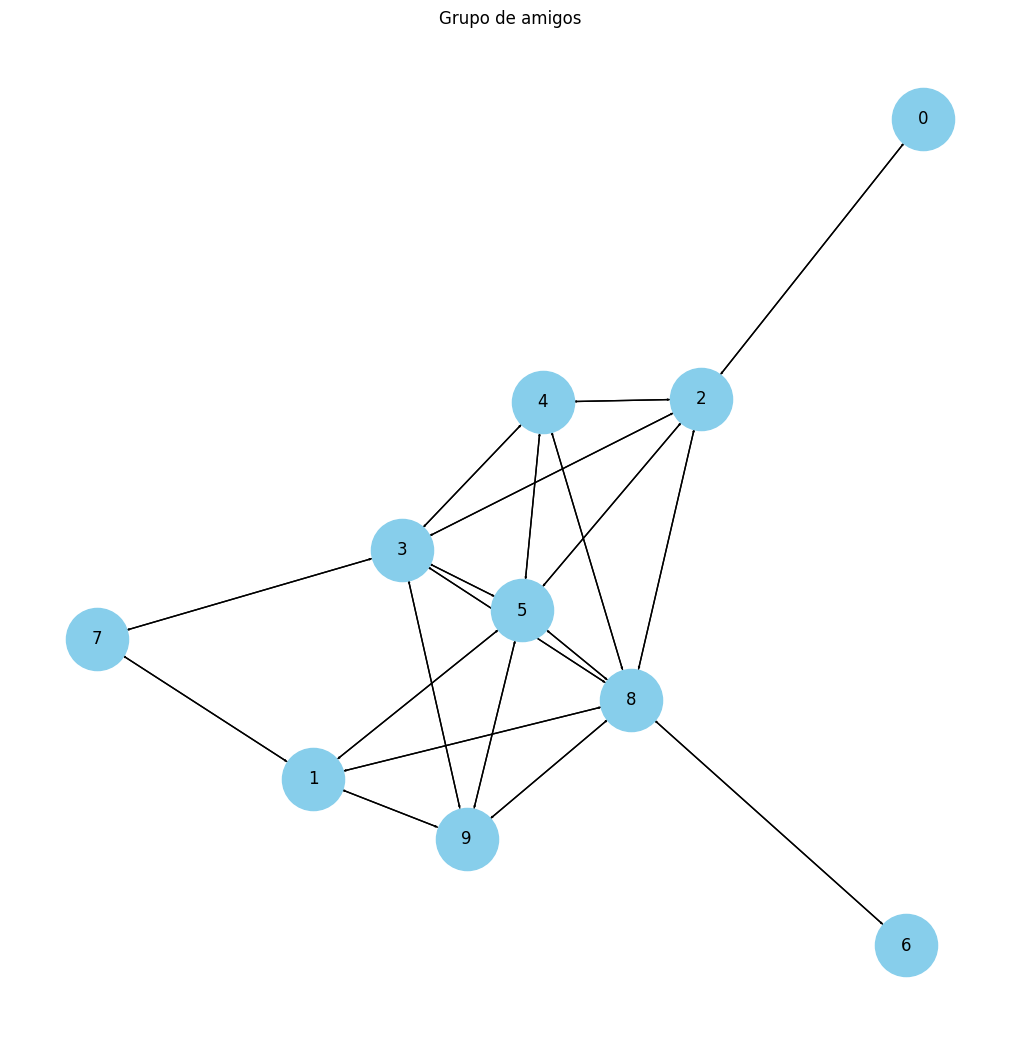

In [109]:
import networkx as nx
import matplotlib.pyplot as plt
def dibujar_grafo(grafo):
    G = nx.DiGraph()

    for origen, destinos in grafo.items():
        for destino in destinos:
            G.add_edge(origen, destino)

    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, arrowstyle='-|>', arrowsize=2)
    plt.title("Grupo de amigos")
    plt.show()
dibujar_grafo(grafo)

In [110]:
ga = galib.GeneticAlgorithm(grafo,population_size=50,
                           generations=10000,
                           crossover_probability=0.8,
                           mutation_probability=0.05,
                           elitism=True,
                           maximise_fitness=True)

##### Representación
La representación para el grafo va a ser en la forma de una lista [], cuya longitud será en el rango $[0,N]$, donde $N$ es el número de nodos del grafo. Esta longitud puede ser variante para representar los nodos que hacen parte de la instancia del individuo para el clique.

In [111]:
def crear_individuo(data):
    individuo=[0 for _ in range(len(data))]
    
    numero_elementos=rand.randint(1,len(data)-1)
    
    elementos_agregados=0
    while elementos_agregados < numero_elementos:
        nodo_random= rand.randint(0,len(individuo)-1)
        if individuo[nodo_random]==0:
            individuo[nodo_random] = 1
            elementos_agregados += 1
            
    return individuo

ga.create_individual=crear_individuo

In [112]:
def crossover(padre_1, padre_2):
    idx_minimo= rand.randint(1,len(padre_1)-1)
    hijo_1 = padre_1[:idx_minimo] + padre_2[idx_minimo:]
    hijo_2 = padre_1[idx_minimo:] + padre_2[:idx_minimo]
    return hijo_1,hijo_2  

def mutacion(individuo):
    indice_mutar = rand.randint(0,len(individuo)-1)
    if individuo[indice_mutar]==0:
        individuo[indice_mutar]=1
    else:
        individuo[indice_mutar]=0
            
def selection(population):
    return rand.choice(population)

ga.crossover_function=crossover
ga.mutate_function=mutacion
ga.selection_function=selection


In [113]:
def fitness(individual, data):
    # Obtener todos los nodos activados
    nodos_activos = []
    
    for i in range(len(individual)):
        if individual[i] == 1:
            nodos_activos.append(i)
    
    # Si hay menos de 2 nodos activados, si es un clique
    if len(nodos_activos) < 2:
        return len(nodos_activos)
    penalizacion=0
    # Verificar que cada par de nodos activos esté conectado
    for i in range(len(nodos_activos)):
        for j in range(i + 1, len(nodos_activos)):
            if nodos_activos[j] not in data[nodos_activos[i]] or nodos_activos[i] not in data[nodos_activos[j]]:
                # Si falta al menos una conexión, no es un clique
                return 0
                
    # Si se cumple la condición de clique se retorna su tamaño
    return len(nodos_activos)

In [ ]:
def fitness2(individual, data):
    # Obtener todos los nodos activados
    nodos_activos = []
    
    for i in range(len(individual)):
        if individual[i] == 1:
            nodos_activos.append(i)
    

    penalizacion=0
    # Verificar que cada par de nodos activos esté conectado
    conexiones={}    
    for i in range(len(nodos_activos)):
        for j in range(i+1,len(nodos_activos)):
            if nodos_activos[i] not in grafo[nodos_activos[j]] and (nodos_activos[i],nodos_activos[j]) not in conexiones and (nodos_activos[j],nodos_activos[i]) not in conexiones:
                conexiones[(nodos_activos[i],nodos_activos[j])] = 1
                penalizacion+=0.5
    # Si se cumple la condición de clique se retorna su tamaño  
    return len(nodos_activos) - penalizacion

In [115]:
input_recibido=input("Fitness 1 o fitness 2? (1/2): ")
if input_recibido=="1":
    ga.fitness_function=fitness
else:
    ga.fitness_function=fitness2

In [116]:
ga.run()

KeyboardInterrupt: 

In [ ]:

nodos_clique.sort()
print("Clique generado: ",nodos_clique)
nodos_encontrados=[]
for i in range(len(ga.best_individual()[1])):
    if ga.best_individual()[1][i]==1:
        nodos_encontrados.append(i)
print("Nodos encontrados: ", nodos_encontrados)
list_comunes= []
for i in nodos_clique:
    if i in nodos_encontrados and i not in list_comunes:
        list_comunes.append(i)
print("Nodos comunes: ", list_comunes, " con ", len(list_comunes), " nodos")

Clique generado:  [0, 1, 6, 7, 9, 11, 13]
Nodos encontrados:  [0, 1, 6, 7, 9, 11, 13]
Nodos comunes:  [0, 1, 6, 7, 9, 11, 13]  con  7  nodos


### Estadistica 🤓☝️

In [ ]:
import pandas as pd
def obtener_promedio(generacion:list):
    suma=0
    for i in range(len(generacion)):
        suma+=generacion[i][0]
    return suma/len(generacion)

def crear_dataframe_avg_fitness(ga : galib.GeneticAlgorithm):
    data = []
    for i in range(len(ga.get_history())):
        promedio_fitness=obtener_promedio(ga.get_history()[i])
        data.append([i, promedio_fitness])
    df = pd.DataFrame(data, columns=["Generacion", "Fitness"])
    return df

def crear_dataframe_mejor_individuo(ga : galib.GeneticAlgorithm):
    data = []
    for i in range(len(ga.get_history())):
        mejor_individuo=ga.get_history()[i][0]
        data.append([i, mejor_individuo[0]])
    df = pd.DataFrame(data, columns=["Generacion", "Fitness"])
    return df
df_avg_fitness = crear_dataframe_avg_fitness(ga)
df_mejor_individuo = crear_dataframe_mejor_individuo(ga)

KeyboardInterrupt: 

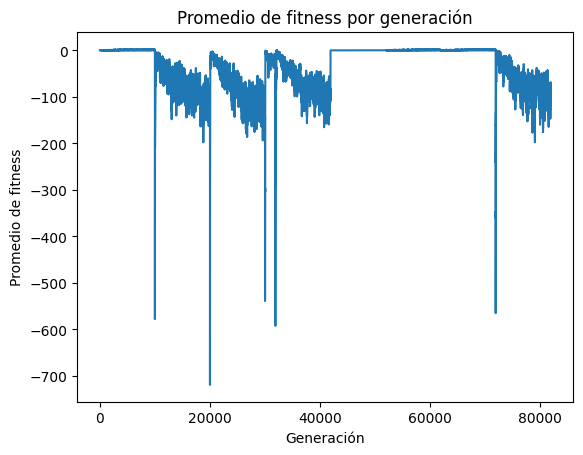

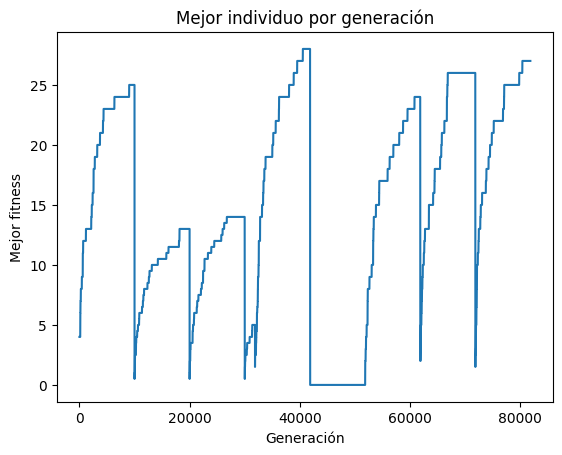

: 

In [ ]:
import matplotlib.pyplot as plt
def graficar_avg_fitness(df_avg_fitness):
    plt.plot(df_avg_fitness["Generacion"], df_avg_fitness["Fitness"])
    plt.title("Promedio de fitness por generación")
    plt.xlabel("Generación")
    plt.ylabel("Promedio de fitness")
    plt.show()
graficar_avg_fitness(df_avg_fitness)
def graficar_mejor_individuo(df_mejor_individuo):
    plt.plot(df_mejor_individuo["Generacion"], df_mejor_individuo["Fitness"])
    plt.title("Mejor individuo por generación")
    plt.xlabel("Generación")
    plt.ylabel("Mejor fitness")
    plt.show()
graficar_mejor_individuo(df_mejor_individuo)

#### Modificación de pyeasyga

In [ ]:
# -*- coding: utf-8 -*-
"""
    pyeasyga module

"""

import random
import copy
from operator import attrgetter

from six.moves import range


class GeneticAlgorithm(object):
    """Genetic Algorithm class.

    This is the main class that controls the functionality of the Genetic
    Algorithm.

    A simple example of usage:

    >>> # Select only two items from the list and maximise profit
    >>> from pyeasyga.pyeasyga import GeneticAlgorithm
    >>> input_data = [('pear', 50), ('apple', 35), ('banana', 40)]
    >>> easyga = GeneticAlgorithm(input_data)
    >>> def fitness (member, data):
    >>>     return sum([profit for (selected, (fruit, profit)) in
    >>>                 zip(member, data) if selected and
    >>>                 member.count(1) == 2])
    >>> easyga.fitness_function = fitness
    >>> easyga.run()
    >>> print easyga.best_individual()

    """

    def __init__(self,
                 seed_data,
                 population_size=50,
                 generations=100,
                 crossover_probability=0.8,
                 mutation_probability=0.2,
                 elitism=True,
                 maximise_fitness=True):
        """Instantiate the Genetic Algorithm.

        :param seed_data: input data to the Genetic Algorithm
        :type seed_data: list of objects
        :param int population_size: size of population
        :param int generations: number of generations to evolve
        :param float crossover_probability: probability of crossover operation
        :param float mutation_probability: probability of mutation operation

        """

        self.seed_data = seed_data
        self.population_size = population_size
        self.generations = generations
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.elitism = elitism
        self.maximise_fitness = maximise_fitness
        self.history = []

        self.current_generation = []

        def create_individual(seed_data):
            """Create a candidate solution representation.

            e.g. for a bit array representation:

            >>> return [random.randint(0, 1) for _ in range(len(data))]

            :param seed_data: input data to the Genetic Algorithm
            :type seed_data: list of objects
            :returns: candidate solution representation as a list

            """
            return [random.randint(0, 1) for _ in range(len(seed_data))]

        def crossover(parent_1, parent_2):
            """Crossover (mate) two parents to produce two children.

            :param parent_1: candidate solution representation (list)
            :param parent_2: candidate solution representation (list)
            :returns: tuple containing two children

            """
            index = random.randrange(1, len(parent_1))
            child_1 = parent_1[:index] + parent_2[index:]
            child_2 = parent_2[:index] + parent_1[index:]
            return child_1, child_2

        def mutate(individual):
            """Reverse the bit of a random index in an individual."""
            mutate_index = random.randrange(len(individual))
            individual[mutate_index] = (0, 1)[individual[mutate_index] == 0]

        def random_selection(population):
            """Select and return a random member of the population."""
            return random.choice(population)

        def tournament_selection(population):
            """Select a random number of individuals from the population and
            return the fittest member of them all.
            """
            if self.tournament_size == 0:
                self.tournament_size = 2
            members = random.sample(population, self.tournament_size)
            members.sort(
                key=attrgetter('fitness'), reverse=self.maximise_fitness)
            return members[0]

        self.fitness_function = None
        self.tournament_selection = tournament_selection
        self.tournament_size = self.population_size // 10
        self.random_selection = random_selection
        self.create_individual = create_individual
        self.crossover_function = crossover
        self.mutate_function = mutate
        self.selection_function = self.tournament_selection

    def create_initial_population(self):
        """Create members of the first population randomly.
        """
        initial_population = []
        for _ in range(self.population_size):
            genes = self.create_individual(self.seed_data)
            individual = Chromosome(genes)
            initial_population.append(individual)
        self.current_generation = initial_population

    def calculate_population_fitness(self):
        """Calculate the fitness of every member of the given population using
        the supplied fitness_function.
        """
        for individual in self.current_generation:
            individual.fitness = self.fitness_function(
                individual.genes, self.seed_data)

    def rank_population(self):
        """Sort the population by fitness according to the order defined by
        maximise_fitness.
        """
        self.current_generation.sort(
            key=attrgetter('fitness'), reverse=self.maximise_fitness)

    def create_new_population(self):
        """Create a new population using the genetic operators (selection,
        crossover, and mutation) supplied.
        """
        new_population = []
        elite = copy.deepcopy(self.current_generation[0])
        selection = self.selection_function

        while len(new_population) < self.population_size:
            parent_1 = copy.deepcopy(selection(self.current_generation))
            parent_2 = copy.deepcopy(selection(self.current_generation))

            child_1, child_2 = parent_1, parent_2
            child_1.fitness, child_2.fitness = 0, 0

            can_crossover = random.random() < self.crossover_probability
            can_mutate = random.random() < self.mutation_probability

            if can_crossover:
                child_1.genes, child_2.genes = self.crossover_function(
                    parent_1.genes, parent_2.genes)

            if can_mutate:
                self.mutate_function(child_1.genes)
                self.mutate_function(child_2.genes)

            new_population.append(child_1)
            if len(new_population) < self.population_size:
                new_population.append(child_2)

        if self.elitism:
            new_population[0] = elite

        self.current_generation = new_population

    def create_first_generation(self):
        """Create the first population, calculate the population's fitness and
        rank the population by fitness according to the order specified.
        """
        self.create_initial_population()
        self.calculate_population_fitness()
        self.rank_population()

    def create_next_generation(self):
        """Create subsequent populations, calculate the population fitness and
        rank the population by fitness in the order specified.
        """
        self.create_new_population()
        self.calculate_population_fitness()
        self.rank_population()

    def run(self):
        """Run (solve) the Genetic Algorithm."""
        self.create_first_generation()
        self.save_history()
        for _ in range(1, self.generations):
            self.create_next_generation()
            self.save_history()

    def best_individual(self):
        """Return the individual with the best fitness in the current
        generation.
        """
        best = self.current_generation[0]
        return (best.fitness, best.genes)

    def last_generation(self):
        """Return members of the last generation as a generator function."""
        return ((member.fitness, member.genes) for member
                in self.current_generation)
        
    def save_history(self):
        """Retorna la iteracion actual de la poblacion para guardar en el historial"""
        iteracion= [] # Lista de población actual
        for member in self.current_generation:
            iteracion.append((member.fitness, member.genes)) 
        self.history.append(iteracion) # Agrega la generacion al historial  
        return self.history

    def get_history(self):
        """Retorna el historial de la poblacion"""
        return self.history
class Chromosome(object):
    """ Chromosome class that encapsulates an individual's fitness and solution
    representation.
    """
    def __init__(self, genes):
        """Initialise the Chromosome."""
        self.genes = genes
        self.fitness = 0

    def __repr__(self):
        """Return initialised Chromosome representation in human readable form.
        """
        return repr((self.fitness, self.genes))
